In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
dir ='/Users/alantrinh/Code/Spiced Academy/garlic-boosting-student-code/07_week_project'
filename = 'TG_STAID004563.txt'
df = pd.read_csv(f'{dir}/{filename}', skiprows=19)
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53564,111448,20220827,205,0
53565,111448,20220828,177,0
53566,100133,20220829,166,0
53567,100133,20220830,172,0


In [4]:
df.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [5]:
df.rename(columns={' SOUID': 'SOUID', '    DATE': 'date', '   TG': 'mean_temp', ' Q_TG': 'Q_TG'}, inplace=True)

In [6]:
df.columns

Index(['SOUID', 'date', 'mean_temp', 'Q_TG'], dtype='object')

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [8]:
df.set_index('date', inplace=True)

In [9]:
df['mean_temp_c'] = df['mean_temp'] * 0.1
df

,SOUID,mean_temp,Q_TG,mean_temp_c
date,,,,
1876-01-01,127488,22,0,2.2
1876-01-02,127488,25,0,2.5
1876-01-03,127488,3,0,0.3
1876-01-04,127488,-58,0,-5.8
1876-01-05,127488,-98,0,-9.8
...,...,...,...,...
2022-08-27,111448,205,0,20.5
2022-08-28,111448,177,0,17.7
2022-08-29,100133,166,0,16.6


In [10]:
df.loc['1965':'2021'][['SOUID', 'Q_TG']].value_counts()

SOUID   Q_TG
121152  0       20578
111448  0         241
dtype: int64

In [11]:
df_1965_2021 = df.loc['1965':'2021']
df_1965_2021

,SOUID,mean_temp,Q_TG,mean_temp_c
date,,,,
1965-01-01,121152,49,0,4.9
1965-01-02,121152,28,0,2.8
1965-01-03,121152,14,0,1.4
1965-01-04,121152,-9,0,-0.9
1965-01-05,121152,24,0,2.4
...,...,...,...,...
2021-12-27,111448,-39,0,-3.9
2021-12-28,111448,-5,0,-0.5
2021-12-29,111448,45,0,4.5


/var/folders/c8/y_c7_b4s2wq1r7z20jclk7g40000gn/T/ipykernel_21003/143126746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1965_2021['mean_temp_c_smooth'] = signal.savgol_filter(df_1965_2021['mean_temp_c'], window_length=201, polyorder=3, mode='nearest')


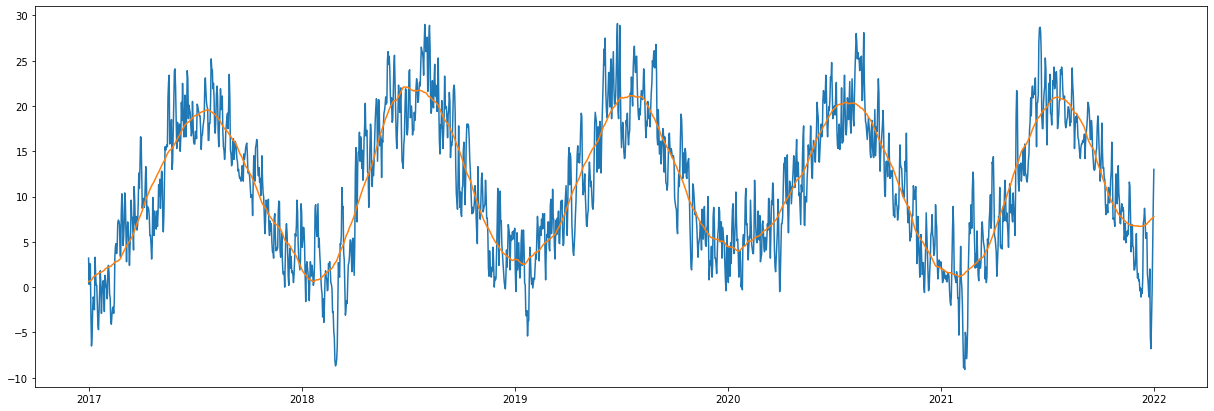

In [82]:
df_1965_2021['mean_temp_c_smooth'] = signal.savgol_filter(df_1965_2021['mean_temp_c'], window_length=201, polyorder=3, mode='nearest')
plt.figure(figsize=(21, 7))
plt.plot(df_1965_2021['2017':'2021'].index, df_1965_2021['2017':'2021']['mean_temp_c'])
plt.plot(df_1965_2021['2017':'2021'].index, df_1965_2021['2017':'2021']['mean_temp_c_smooth'])
plt.show()

In [168]:
df_1965_2021['mean_temp_c_noise'] = df_1965_2021['mean_temp_c'] - df_1965_2021['mean_temp_c_smooth']

/var/folders/c8/y_c7_b4s2wq1r7z20jclk7g40000gn/T/ipykernel_21003/1725637452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1965_2021['mean_temp_c_noise'] = df_1965_2021['mean_temp_c'] - df_1965_2021['mean_temp_c_smooth']


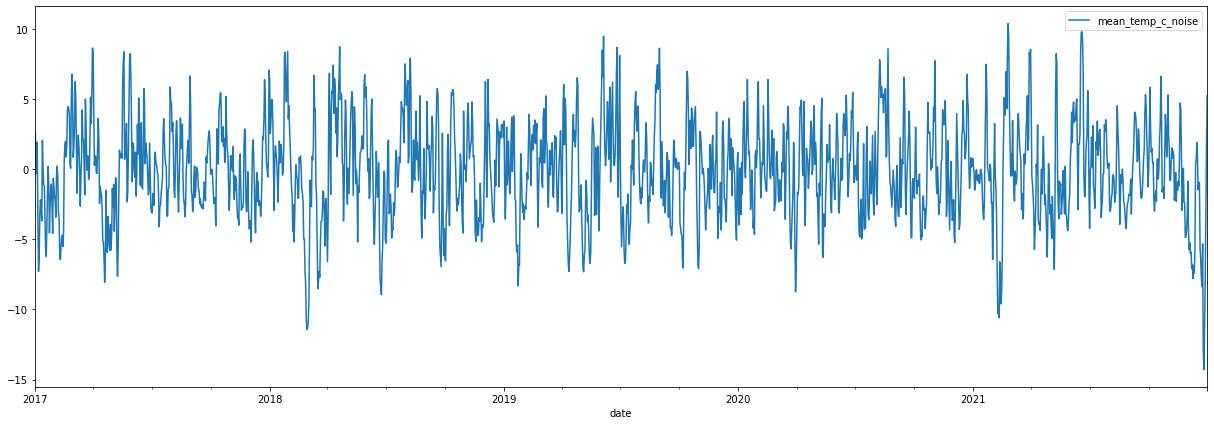

In [169]:
df_1965_2021['2017':'2021'].plot(y='mean_temp_c_noise', figsize=(21, 7));

In [143]:
df_train = df_1965_2021.loc[:'2020'][['mean_temp_c_smooth', 'mean_temp_c_noise']]
df_train.to_csv('climate_train.csv')

In [144]:
df_train

,mean_temp_c_smooth,mean_temp_c_noise
date,,
1965-01-01,2.136273,2.763727
1965-01-02,2.061469,0.738531
1965-01-03,2.006287,-0.606287
1965-01-04,1.964770,-2.864770
1965-01-05,1.899926,0.500074
...,...,...
2020-12-27,2.244560,-0.544560
2020-12-28,2.194787,0.805213
2020-12-29,2.149524,0.150476


In [145]:
df_test = df_1965_2021.loc['2021'][['mean_temp_c_smooth', 'mean_temp_c_noise']]
df_test.to_csv('climate_test.csv')

In [146]:
df_test

,mean_temp_c_smooth,mean_temp_c_noise
date,,
2021-01-01,1.988459,0.211541
2021-01-02,1.997070,-0.197070
2021-01-03,1.996033,-1.496033
2021-01-04,1.963307,-1.163307
2021-01-05,1.913972,-0.113972
...,...,...
2021-12-27,7.550044,-11.450044
2021-12-28,7.608149,-8.108149
2021-12-29,7.660353,-3.160353


### Model Trend

In [147]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [148]:
df_train['timestep'] = list(range(df_train.shape[0]))
df_train['t2'] = df_train['timestep']**2
df_train[['timestep', 't2']]

,timestep,t2
date,,
1965-01-01,0,0
1965-01-02,1,1
1965-01-03,2,4
1965-01-04,3,9
1965-01-05,4,16
...,...,...
2020-12-27,20449,418161601
2020-12-28,20450,418202500
2020-12-29,20451,418243401


In [149]:
daily_lambda = 1600*(3*30.437**4) #adjust quarterly lambda for daily
df_train['detrended'], df_train['trend'] = sm.tsa.filters.hpfilter(df_train['mean_temp_c_smooth'], daily_lambda)
df_train

,mean_temp_c_smooth,mean_temp_c_noise,timestep,t2,detrended,trend
date,,,,,,
1965-01-01,2.136273,2.763727,0,0,-4.830524,6.966797
1965-01-02,2.061469,0.738531,1,1,-4.911623,6.973092
1965-01-03,2.006287,-0.606287,2,4,-4.973100,6.979386
1965-01-04,1.964770,-2.864770,3,9,-5.020911,6.985681
1965-01-05,1.899926,0.500074,4,16,-5.092050,6.991976
...,...,...,...,...,...,...
2020-12-27,2.244560,-0.544560,20449,418161601,-9.450550,11.695110
2020-12-28,2.194787,0.805213,20450,418202500,-9.499029,11.693816
2020-12-29,2.149524,0.150476,20451,418243401,-9.542999,11.692523


<AxesSubplot:xlabel='date'>

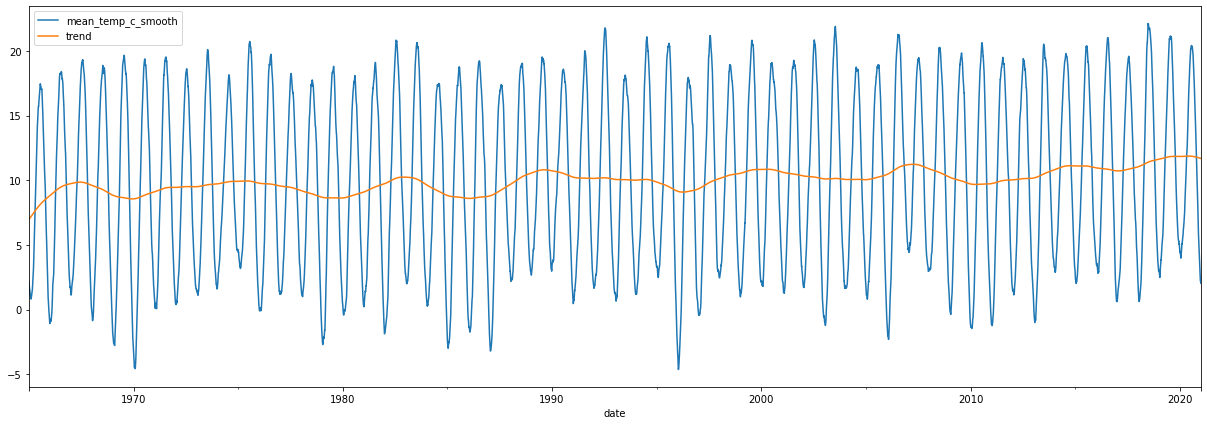

In [150]:
df_train[['mean_temp_c_smooth', 'trend']].plot(figsize=(21, 7))

### Model Seasonality

In [151]:
df_train['month'] = df_train.index.month

In [152]:
seasonal_dummies = pd.get_dummies(
    df_train['month'], 
    prefix='month', 
    drop_first=True
).set_index(df_train.index)

seasonal_dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,
1965-01-01,0,0,0,0,0,0,0,0,0,0,0
1965-01-02,0,0,0,0,0,0,0,0,0,0,0
1965-01-03,0,0,0,0,0,0,0,0,0,0,0
1965-01-04,0,0,0,0,0,0,0,0,0,0,0
1965-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0,0,0,0,0,0,0,0,0,0,1
2020-12-28,0,0,0,0,0,0,0,0,0,0,1
2020-12-29,0,0,0,0,0,0,0,0,0,0,1


In [153]:
df_train = pd.concat([df_train, seasonal_dummies], axis=1)
df_train

,mean_temp_c_smooth,mean_temp_c_noise,timestep,t2,detrended,trend,month,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,
1965-01-01,2.136273,2.763727,0,0,-4.830524,6.966797,1,0,0,0,0,0,0,0,0,0,0,0
1965-01-02,2.061469,0.738531,1,1,-4.911623,6.973092,1,0,0,0,0,0,0,0,0,0,0,0
1965-01-03,2.006287,-0.606287,2,4,-4.973100,6.979386,1,0,0,0,0,0,0,0,0,0,0,0
1965-01-04,1.964770,-2.864770,3,9,-5.020911,6.985681,1,0,0,0,0,0,0,0,0,0,0,0
1965-01-05,1.899926,0.500074,4,16,-5.092050,6.991976,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2.244560,-0.544560,20449,418161601,-9.450550,11.695110,12,0,0,0,0,0,0,0,0,0,0,1
2020-12-28,2.194787,0.805213,20450,418202500,-9.499029,11.693816,12,0,0,0,0,0,0,0,0,0,0,1
2020-12-29,2.149524,0.150476,20451,418243401,-9.542999,11.692523,12,0,0,0,0,0,0,0,0,0,0,1


In [154]:
X_seasonality = df_train[df_train.columns[-11:]]
y_seasonality = df_train['detrended']

In [155]:
seasonality_model = LinearRegression()
seasonality_model.fit(X_seasonality, y_seasonality)

LinearRegression()

In [156]:
df_train['seasonality'] = seasonality_model.predict(X_seasonality)

<AxesSubplot:xlabel='date'>

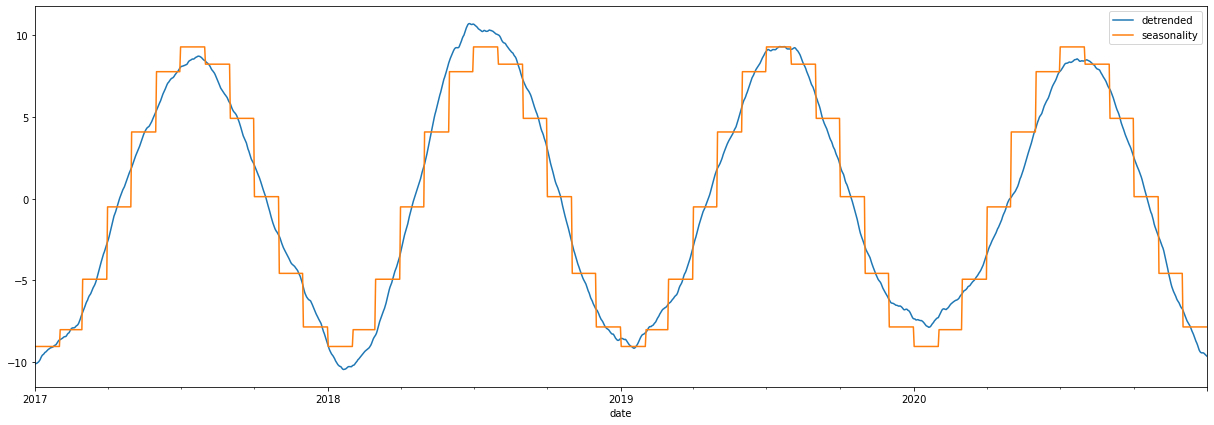

In [170]:
# Plot detrended vs seasonality prediction
df_train[['detrended', 'seasonality']].plot(figsize=(21, 7))

<AxesSubplot:xlabel='date'>

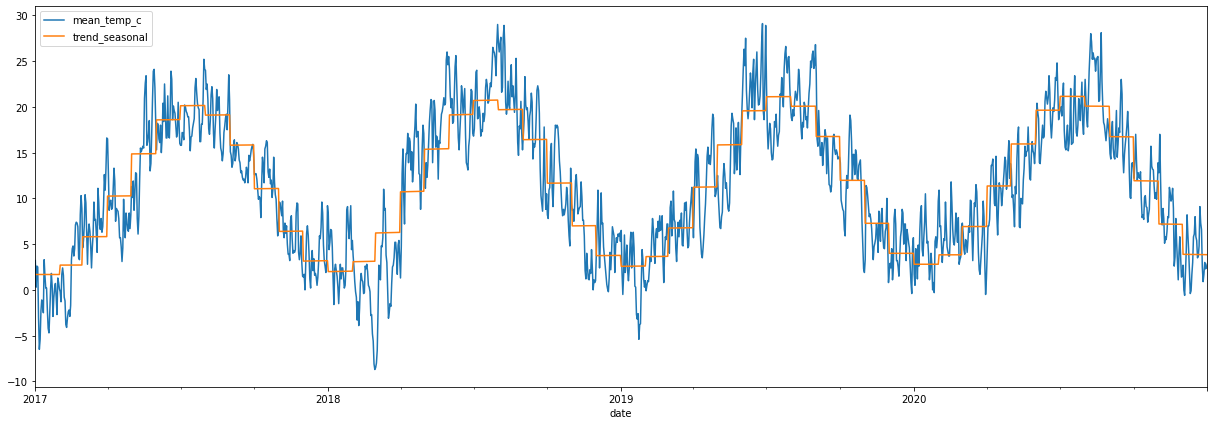

In [166]:
# Plot trend and seasonality vs original data
df_train['trend_seasonal'] = df_train['trend'] + df_train['seasonality']
df_train['mean_temp_c'] = df_train['mean_temp_c_smooth'] + df_train['mean_temp_c_noise']
df_train['2017':'2021'][['mean_temp_c', 'trend_seasonal']].plot(figsize=(21, 7))

In [177]:
df_train

,mean_temp_c_smooth,mean_temp_c_noise,timestep,t2,detrended,trend,month,month_2,month_3,month_4,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonality,trend_seasonal,mean_temp_c
date,,,,,,,,,,,,,,,,,,,,,
1965-01-01,2.136273,2.763727,0,0,-4.830524,6.966797,1,0,0,0,...,0,0,0,0,0,0,0,-9.037005,-2.070208,4.9
1965-01-02,2.061469,0.738531,1,1,-4.911623,6.973092,1,0,0,0,...,0,0,0,0,0,0,0,-9.037005,-2.063913,2.8
1965-01-03,2.006287,-0.606287,2,4,-4.973100,6.979386,1,0,0,0,...,0,0,0,0,0,0,0,-9.037005,-2.057618,1.4
1965-01-04,1.964770,-2.864770,3,9,-5.020911,6.985681,1,0,0,0,...,0,0,0,0,0,0,0,-9.037005,-2.051324,-0.9
1965-01-05,1.899926,0.500074,4,16,-5.092050,6.991976,1,0,0,0,...,0,0,0,0,0,0,0,-9.037005,-2.045029,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2.244560,-0.544560,20449,418161601,-9.450550,11.695110,12,0,0,0,...,0,0,0,0,0,0,1,-7.842377,3.852733,1.7
2020-12-28,2.194787,0.805213,20450,418202500,-9.499029,11.693816,12,0,0,0,...,0,0,0,0,0,0,1,-7.842377,3.851440,3.0
2020-12-29,2.149524,0.150476,20451,418243401,-9.542999,11.692523,12,0,0,0,...,0,0,0,0,0,0,1,-7.842377,3.850146,2.3


<AxesSubplot:xlabel='date'>

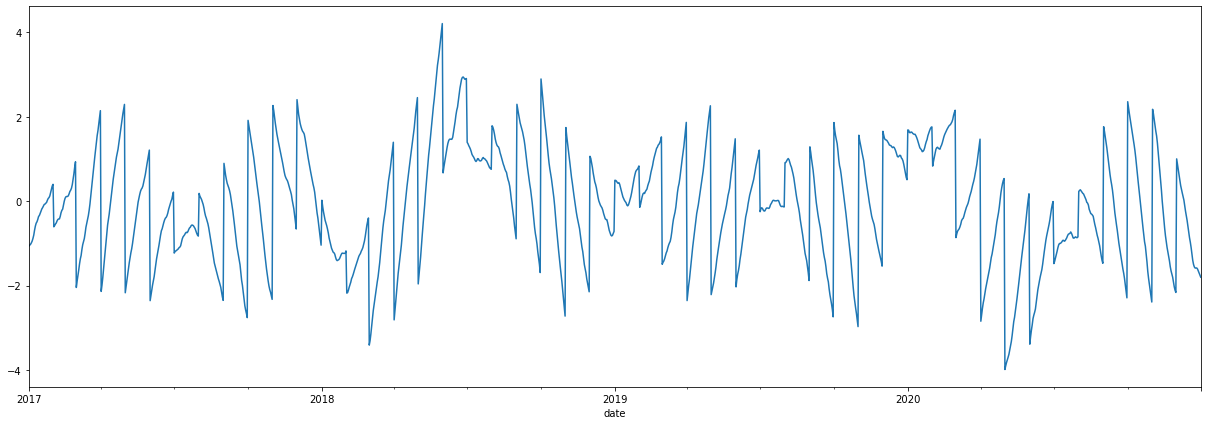

In [179]:
df_train['remainder'] = df_train['mean_temp_c_smooth'] - df_train['trend_seasonal']
df_train['2017':'2021']['remainder'].plot(figsize=(21, 7))

In [180]:
df_remainder = df_train['remainder'].reset_index()
df_remainder.to_csv('climate_remainder.csv', index=False)

### Autocorrelation of Remainder

In [205]:
# maximum interval to consider
df_remainder = df_train[['remainder']].copy(deep=True)

p = 3
lags = [i + 1 for i in range(p)]

for lag in lags:
    df_remainder[f'lag{lag}'] = df_remainder['remainder'].shift(lag)

df_remainder

,remainder,lag1,lag2,lag3
date,,,,
1965-01-01,4.206481,NaN,NaN,NaN
1965-01-02,4.125381,4.206481,NaN,NaN
1965-01-03,4.063905,4.125381,4.206481,NaN
1965-01-04,4.016093,4.063905,4.125381,4.206481
1965-01-05,3.944954,4.016093,4.063905,4.125381
...,...,...,...,...
2020-12-27,-1.608173,-1.582688,-1.584400,-1.585802
2020-12-28,-1.656653,-1.608173,-1.582688,-1.584400
2020-12-29,-1.700622,-1.656653,-1.608173,-1.582688


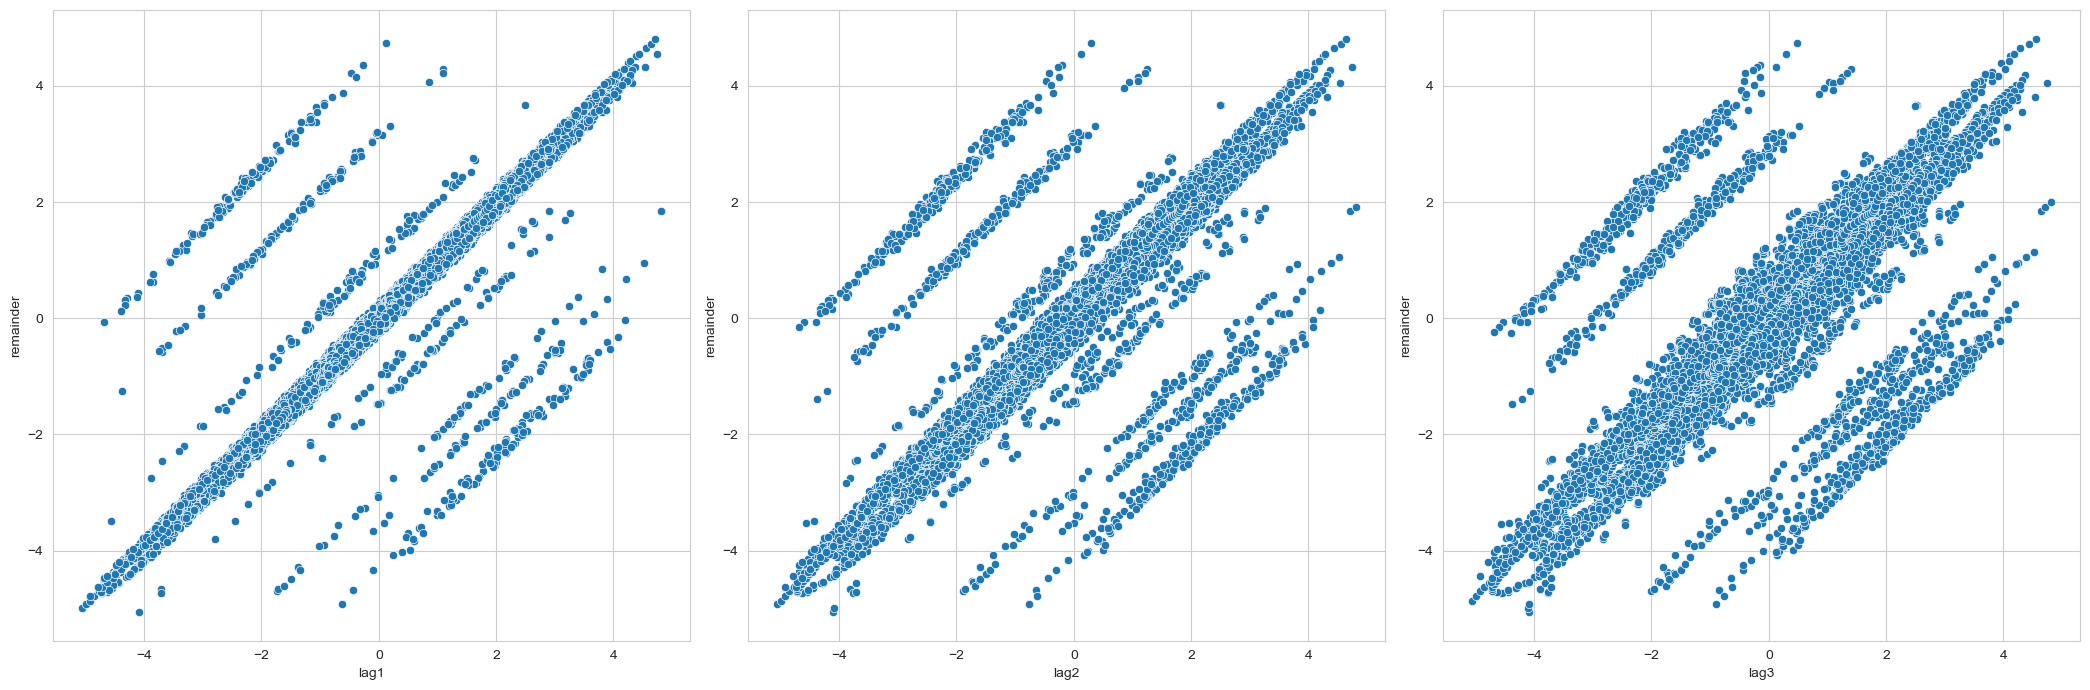

In [251]:
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, p, figsize=(21, 7), dpi=100)
gs = gridspec.GridSpec(1, p)

for i in range(p):
    sns.scatterplot(x=df_remainder[f'lag{i + 1}'], y=df_remainder['remainder'], ax = axes[i])

plt.tight_layout()

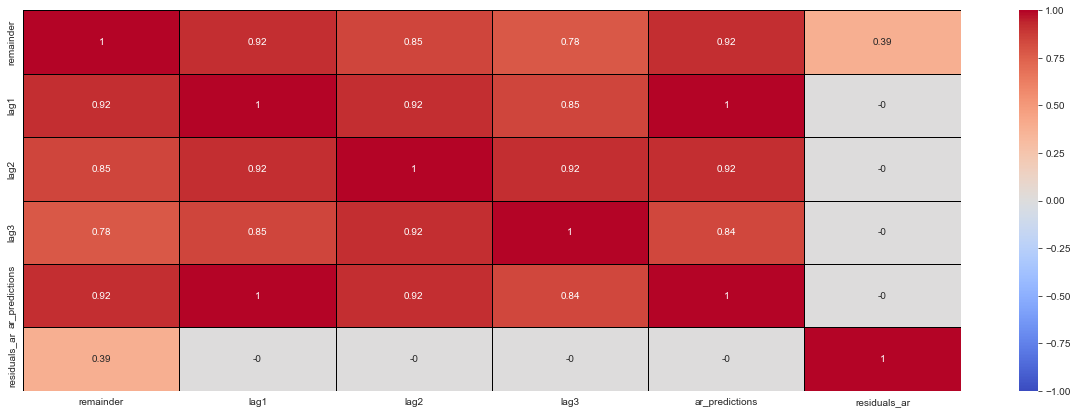

In [235]:
sns.heatmap(
    round(df_remainder.corr(), 2),
    cmap='coolwarm',
    linecolor='black',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
);

In [236]:
df_remainder.dropna(inplace=True)
df_remainder.head()

,remainder,lag1,lag2,lag3,ar_predictions,residuals_ar
date,,,,,,
1965-01-04,4.016093,4.063905,4.125381,4.206481,3.736729,0.279364
1965-01-05,3.944954,4.016093,4.063905,4.125381,3.692915,0.252039
1965-01-06,3.888858,3.944954,4.016093,4.063905,3.627211,0.261647
1965-01-07,3.839885,3.888858,3.944954,4.016093,3.575794,0.264091
1965-01-08,3.788306,3.839885,3.888858,3.944954,3.530835,0.257471


In [237]:
X_remainder = df_remainder[['lag1', 'lag2']]
y_remainder = df_remainder['remainder']

In [238]:
ar_model = LinearRegression()
ar_model.fit(X_remainder, y_remainder)

LinearRegression()

In [239]:
df_remainder['ar_predictions'] = ar_model.predict(X_remainder)

<AxesSubplot:xlabel='date'>

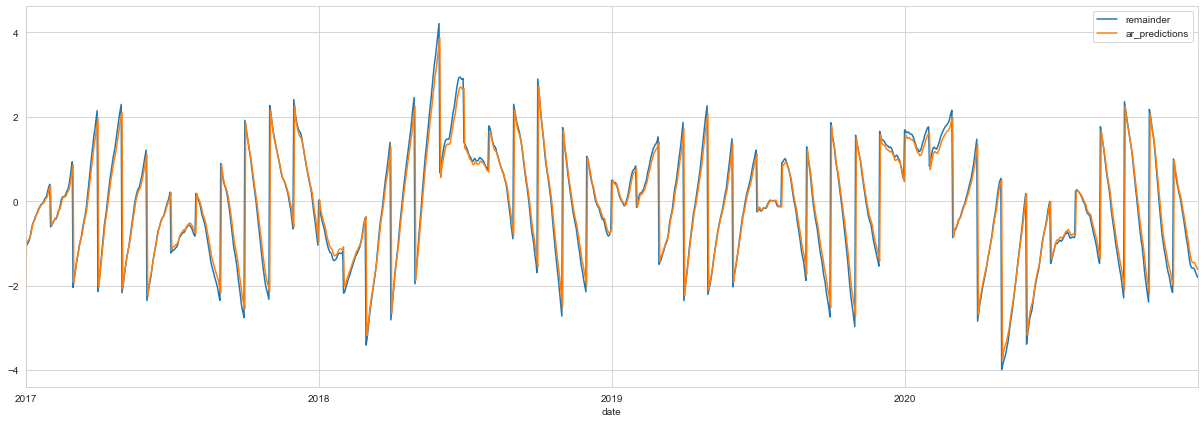

In [240]:
df_remainder['2017':'2021'][['remainder', 'ar_predictions']].plot(figsize=(21, 7), legend=True)

### Partial autocorrelation

In [241]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

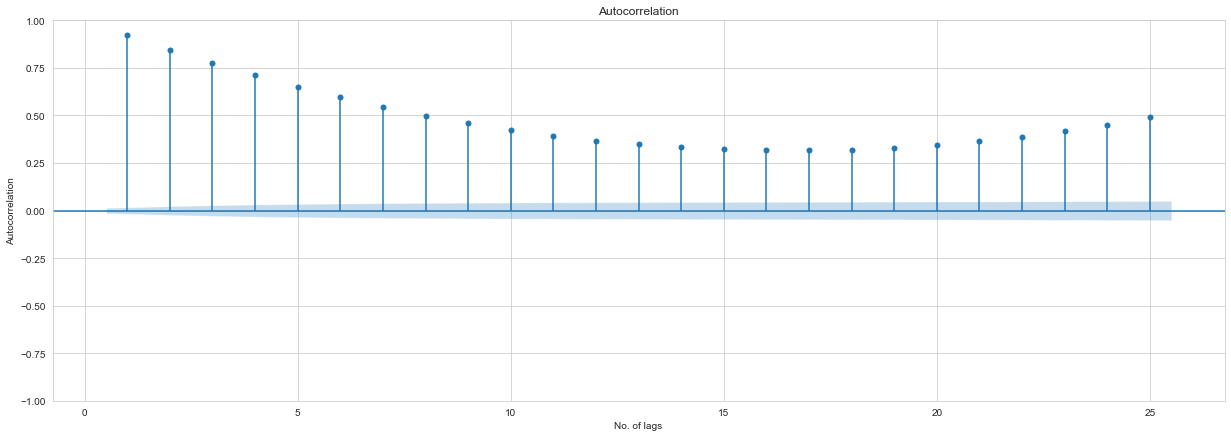

In [242]:
plot_acf(df_remainder['remainder'], zero=False, lags=25)
plt.xlabel('No. of lags')
plt.ylabel('Autocorrelation');

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


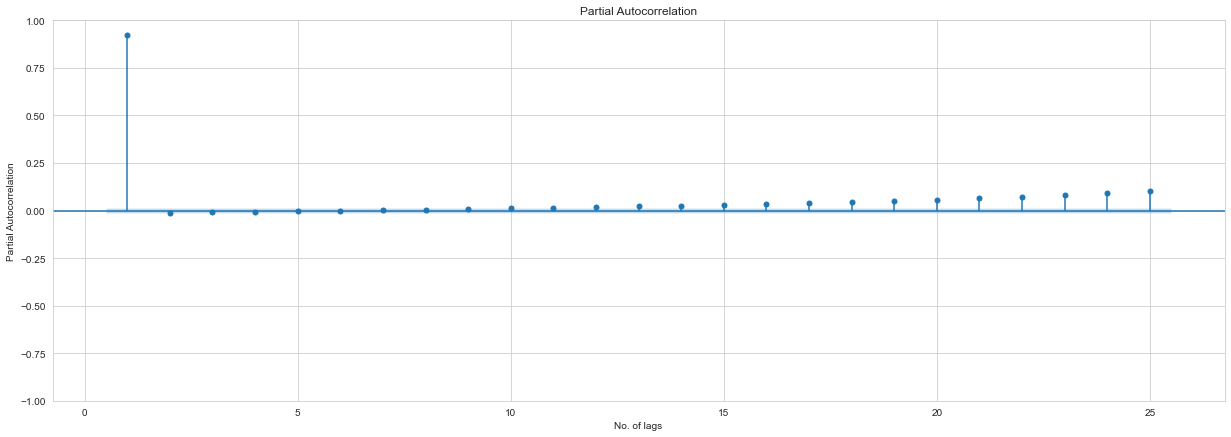

In [243]:
plot_pacf(df_remainder['remainder'], zero=False, lags=25)
plt.xlabel('No. of lags')
plt.ylabel('Partial Autocorrelation');

### IID Noise

In [244]:
df_remainder['residuals_ar'] = df_remainder['remainder'] - df_remainder['ar_predictions']
df_remainder

,remainder,lag1,lag2,lag3,ar_predictions,residuals_ar
date,,,,,,
1965-01-04,4.016093,4.063905,4.125381,4.206481,3.733206,0.282887
1965-01-05,3.944954,4.016093,4.063905,4.125381,3.689578,0.255377
1965-01-06,3.888858,3.944954,4.016093,4.063905,3.623879,0.264979
1965-01-07,3.839885,3.888858,3.944954,4.016093,3.572464,0.267420
1965-01-08,3.788306,3.839885,3.888858,3.944954,3.527641,0.260665
...,...,...,...,...,...,...
2020-12-27,-1.608173,-1.582688,-1.584400,-1.585802,-1.454824,-0.153349
2020-12-28,-1.656653,-1.608173,-1.582688,-1.584400,-1.478689,-0.177963
2020-12-29,-1.700622,-1.656653,-1.608173,-1.582688,-1.523743,-0.176879


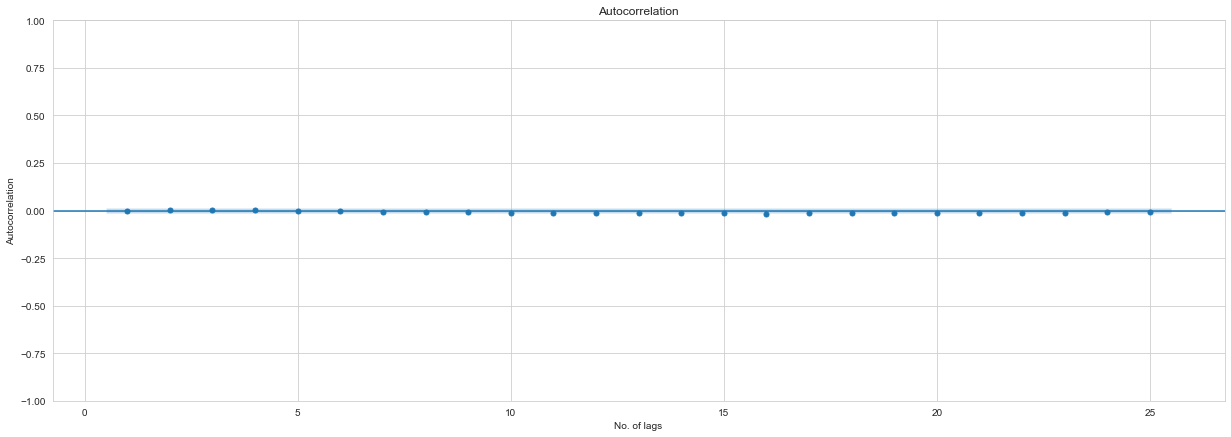

In [245]:
plot_acf(df_remainder['residuals_ar'], zero=False, lags=25)
plt.xlabel('No. of lags')
plt.ylabel('Autocorrelation');

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


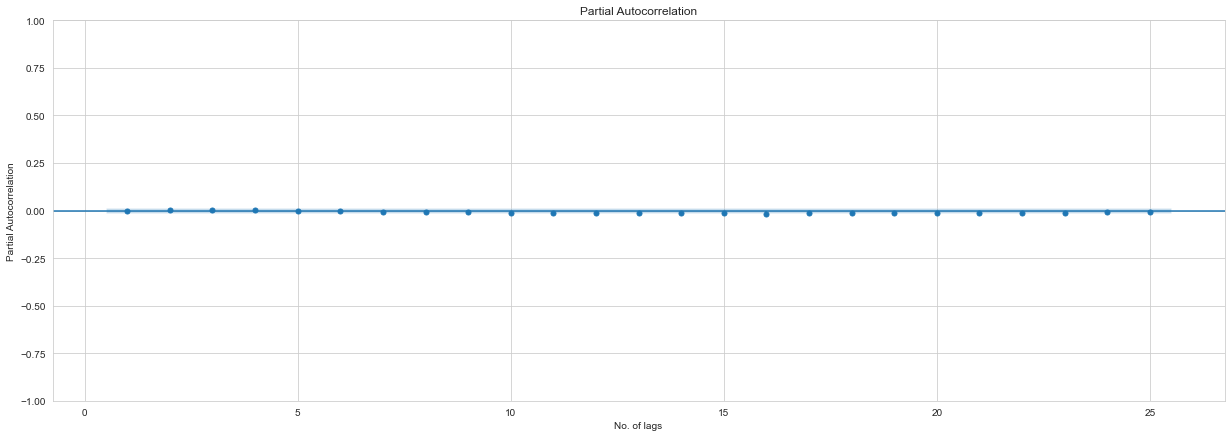

In [246]:
plot_pacf(df_remainder['residuals_ar'], zero=False, lags=25)
plt.xlabel('No. of lags')
plt.ylabel('Partial Autocorrelation');

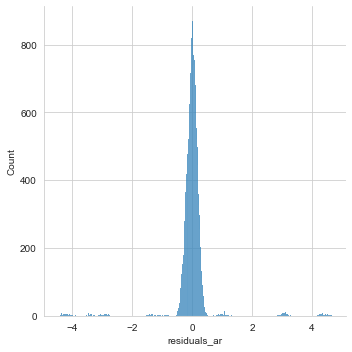

In [247]:
sns.displot(df_remainder['residuals_ar']);

In [255]:
df_train['total_pred'] = df_train['trend_seasonal'] + df_train['remainder']
df_train[['mean_temp_c', 'trend_seasonal', 'total_pred']]

,mean_temp_c,trend_seasonal,total_pred
date,,,
1965-01-01,4.9,-2.070208,2.136273
1965-01-02,2.8,-2.063913,2.061469
1965-01-03,1.4,-2.057618,2.006287
1965-01-04,-0.9,-2.051324,1.964770
1965-01-05,2.4,-2.045029,1.899926
...,...,...,...
2020-12-27,1.7,3.852733,2.244560
2020-12-28,3.0,3.851440,2.194787
2020-12-29,2.3,3.850146,2.149524


<AxesSubplot:xlabel='date'>

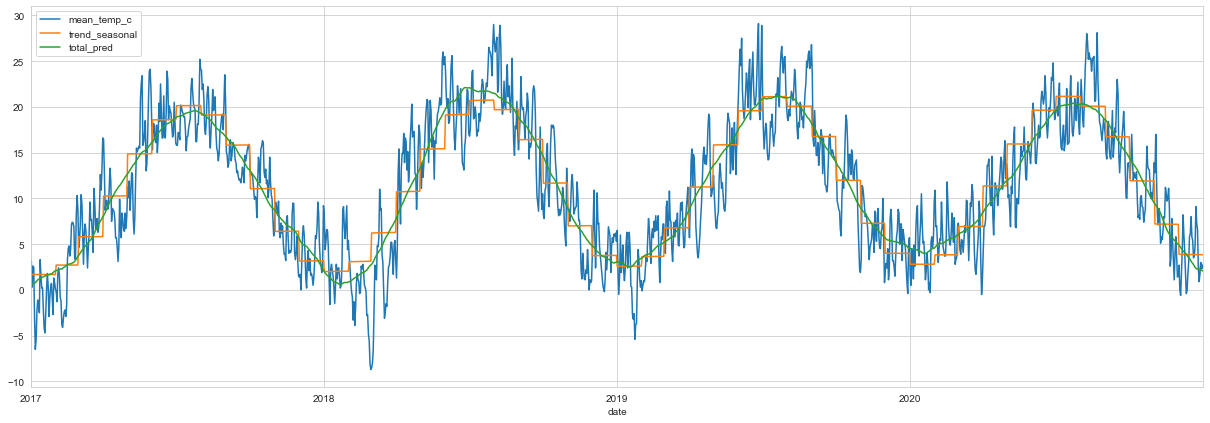

In [257]:
df_train['2017':'2021'][['mean_temp_c', 'trend_seasonal', 'total_pred']].plot(figsize=(21,7))

In [259]:

from sklearn.metrics import r2_score

In [262]:
# Baseline model
r2_tot = round(r2_score(df_train['mean_temp_c'],df_train['trend_seasonal']),6)
print(f"r2_score: {r2_tot}")

r2_score: 0.748456


In [263]:
# Complete model
r2_tot = round(r2_score(df_train['mean_temp_c'],df_train['total_pred']),6)
print(f"r2_score: {r2_tot}")

r2_score: 0.785694
